In [12]:
import pandas as pd
from binance import Client
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Binance API credentials
api_key = "5bb2b139e2f3693d8b35ca1f8252723355505d562b8e20625b513d0415f2a1e9"
api_secret = "7bbec5768461b201caba13b9605b0bc7fa0332a06f9480d5ef3405edd582ae80"

client = Client(api_key, api_secret)

# Get historical candlestick data
candlesticks = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2021", "1 Jan, 2023")
# Create DataFrame from the candlestick data
df = pd.DataFrame(candlesticks, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
                                         'Quote Asset Volume', 'Number_of_Trades', 'Taker Buy Base Volume',
                                         'Taker Buy Quote Volume', 'Ignore'])

# Drop unnecessary columns
columns_to_drop = ['Quote Asset Volume', 'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore']
df = df.drop(columns=columns_to_drop)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], unit='ms')

# Convert relevant columns to numeric
cols_to_numeric = ['Open', 'High', 'Low', 'Close', 'Volume']
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric)

# Calculate the 'tomorrow' column and the 'target' column
df["tomorrow"] = df["Close"].shift(-1)
df["target"] = (df["tomorrow"] > df["Close"]).astype(int)

# Get the actual target values and the predicted target values
actual_target = df['target'].iloc[:-1]
predicted_target = df['target'].shift(-1).iloc[:-1]

In [13]:
# Save the DataFrame with the prediction to a CSV file
df.to_csv('historical_data_with_prediction.csv', index=False)

In [15]:

accuracy = accuracy_score(actual_target, predicted_target)
precision = precision_score(actual_target, predicted_target)
recall = recall_score(actual_target, predicted_target)
f1 = f1_score(actual_target, predicted_target)
confusion = confusion_matrix(actual_target, predicted_target)

In [16]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.46164383561643835
Precision: 0.44
Recall: 0.43874643874643876
F1-score: 0.43937232524964337
Confusion Matrix:
[[183 196]
 [197 154]]


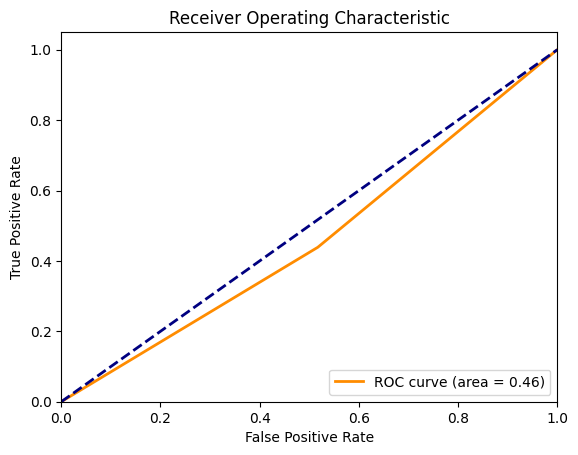

In [17]:
fpr, tpr, _ = roc_curve(actual_target, predicted_target)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()